In [1]:

import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from sklearn.cluster import KMeans

warnings.simplefilter('ignore')

/tmp/ipykernel_63877/718983147.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
go_staff = load_db('source/go_staff.sqlite')

sales_staff  = load_table(go_staff, 'sales_staff')
sales_branch = load_table(go_staff, 'sales_branch')

In [3]:
merged   = pd.merge(sales_staff, sales_branch, on='SALES_BRANCH_CODE')
filtered = merged.loc[:, ['POSITION_EN', 'DATE_HIRED', 'REGION', 'CITY']]
filtered

,POSITION_EN,DATE_HIRED,REGION,CITY
0,Level 2 Sales Representative,23-Jul-1998 12:00:00 AM,None,Kuopio
1,Level 2 Sales Representative,15-Dec-1998 12:00:00 AM,None,Seoul
2,Level 3 Sales Representative,27-Nov-1998 12:00:00 AM,None,Seoul
3,Level 2 Sales Representative,07-Oct-1998 12:00:00 AM,Taipei,San Chung
4,Level 3 Sales Representative,08-May-1996 12:00:00 AM,Taipei,San Chung
...,...,...,...,...
97,Level 2 Sales Representative,19-Feb-1998 12:00:00 AM,Vizcaya,Bilbao
98,Branch Manager,12-Aug-1997 12:00:00 AM,SP,São Paulo
99,Level 3 Sales Representative,10-Feb-2001 12:00:00 AM,SP,São Paulo
100,Level 2 Sales Representative,14-Feb-1999 12:00:00 AM,SP,São Paulo


In [4]:
one_hot = pd.get_dummies(filtered, columns=['POSITION_EN', 'REGION', 'CITY'])
one_hot['DATE_HIRED'] = (pd.to_datetime(one_hot['DATE_HIRED']).astype(int) / 10**9).astype(int)
one_hot

,DATE_HIRED,POSITION_EN_Branch Manager,POSITION_EN_District Manager,POSITION_EN_General Manager,POSITION_EN_Level 1 Sales Representative,POSITION_EN_Level 2 Sales Representative,POSITION_EN_Level 3 Sales Representative,POSITION_EN_Regional Manager,REGION_Alberta,REGION_California,...,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich
0,901152000,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,913680000,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,912124800,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,907718400,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,831513600,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,887846400,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,871344000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
99,981763200,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
100,918950400,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [5]:
prepared = pd.concat([filtered, one_hot], axis=1)
prepared.drop(['POSITION_EN', 'DATE_HIRED', 'REGION', 'CITY'], axis=1, inplace=True)

prepared

,POSITION_EN_Branch Manager,POSITION_EN_District Manager,POSITION_EN_General Manager,POSITION_EN_Level 1 Sales Representative,POSITION_EN_Level 2 Sales Representative,POSITION_EN_Level 3 Sales Representative,POSITION_EN_Regional Manager,REGION_Alberta,REGION_California,REGION_Florida,...,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
99,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
100,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


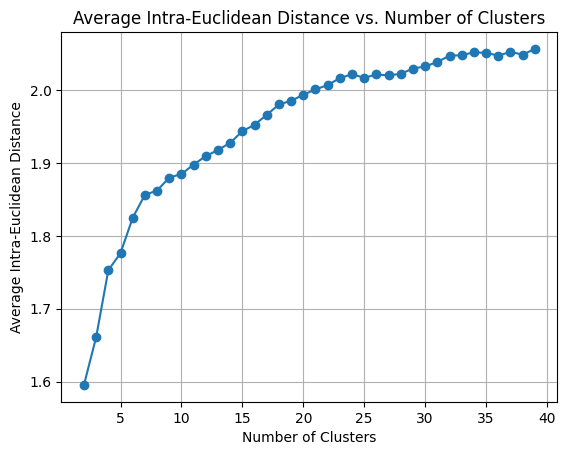

In [6]:


def calculateTotalAverageIntraEuclideanDistance(origin: pd.DataFrame, centroids: pd.DataFrame) -> float:
    totalEuclid = 0
    num_data_points = len(origin)
    num_centroids = len(centroids)

    for origin_index, _ in origin.iterrows():
        for centroid_index, _ in centroids.iterrows():
            euclidSum = 0
            for column in centroids.columns:
                euclidSum += (origin.at[origin_index, column] - centroids.at[centroid_index, column]) ** 2
            totalEuclid += math.sqrt(euclidSum)

    totalEuclid /= (num_data_points * num_centroids)
    return totalEuclid


distances = []
for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(prepared)

    kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
    for i in range(len(kmeans_centra.columns)):
        kmeans_centra.rename(columns={i: prepared.columns[i]}, inplace=True)
    kmeans_centra

    averageIntraDistance = calculateTotalAverageIntraEuclideanDistance(prepared, kmeans_centra)
    distances.append(averageIntraDistance)


# Plot the graph with the identified elbow point
plt.plot(range(2, 40), distances, marker='o')
plt.title('Average Intra-Euclidean Distance vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Intra-Euclidean Distance')
plt.grid(True)

In [7]:
kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit_predict(prepared)

kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
for i in range(len(kmeans_centra.columns)):
    kmeans_centra.rename(columns={i: prepared.columns[i]}, inplace=True)
kmeans_centra

kmeans_centra

,POSITION_EN_Branch Manager,POSITION_EN_District Manager,POSITION_EN_General Manager,POSITION_EN_Level 1 Sales Representative,POSITION_EN_Level 2 Sales Representative,POSITION_EN_Level 3 Sales Representative,POSITION_EN_Regional Manager,REGION_Alberta,REGION_California,REGION_Florida,...,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich
0,2.000000e-01,0.000000e+00,0.000000e+00,0.200000,4.000000e-01,2.000000e-01,0.000000e+00,0.000000e+00,-6.938894e-18,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18
1,2.000000e-01,0.000000e+00,0.000000e+00,0.000000,4.000000e-01,2.000000e-01,2.000000e-01,0.000000e+00,-6.938894e-18,0.000000e+00,...,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18
2,-8.326673e-17,2.081668e-17,5.204170e-18,0.000000,-1.665335e-16,1.000000e+00,1.040834e-17,-1.387779e-17,0.000000e+00,-1.387779e-17,...,0.052632,5.263158e-02,-1.387779e-17,5.263158e-02,5.263158e-02,5.263158e-02,5.263158e-02,-1.387779e-17,5.263158e-02,5.263158e-02
3,1.666667e-01,0.000000e+00,0.000000e+00,0.166667,6.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,6.938894e-18,1.734723e-18,1.000000,0.000000e+00,0.000000e+00,3.469447e-18,6.938894e-18,0.000000e+00,6.938894e-18,...,0.111111,3.469447e-18,6.938894e-18,3.469447e-18,3.469447e-18,0.000000e+00,1.111111e-01,6.938894e-18,3.469447e-18,1.111111e-01
5,2.000000e-01,0.000000e+00,0.000000e+00,0.200000,4.000000e-01,2.000000e-01,0.000000e+00,0.000000e+00,-6.938894e-18,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18,0.000000e+00,1.000000e+00,0.000000e+00,-3.469447e-18
6,-1.110223e-16,2.081668e-17,5.204170e-18,0.000000,1.000000e+00,-2.775558e-17,1.040834e-17,-2.081668e-17,-6.938894e-18,-2.081668e-17,...,0.040000,4.000000e-02,-2.081668e-17,4.000000e-02,4.000000e-02,4.000000e-02,1.040834e-17,-2.081668e-17,4.000000e-02,4.000000e-02
7,1.000000e+00,6.938894e-18,1.734723e-18,0.000000,-5.551115e-17,-2.775558e-17,3.469447e-18,-6.938894e-18,-6.938894e-18,-6.938894e-18,...,0.076923,3.469447e-18,-6.938894e-18,3.469447e-18,3.469447e-18,7.692308e-02,3.469447e-18,-6.938894e-18,3.469447e-18,-3.469447e-18
8,2.000000e-01,0.000000e+00,0.000000e+00,0.200000,4.000000e-01,2.000000e-01,0.000000e+00,0.000000e+00,-6.938894e-18,1.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18
9,0.000000e+00,6.000000e-01,2.000000e-01,0.000000,0.000000e+00,-2.775558e-17,2.000000e-01,0.000000e+00,-6.938894e-18,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,-3.469447e-18
